In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("Insurance Dataset.csv")

In [4]:
df.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [5]:
df.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [6]:
df.isnull().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [7]:
df.shape

(1048575, 24)

In [8]:
df.nunique()

Area_Service                                  7
Hospital County                              51
Hospital Id                                 143
Age                                           5
Gender                                        3
Cultural_group                                4
ethnicity                                     3
Days_spend_hsptl                            120
Admission_type                                6
Home or self care,                           19
ccs_diagnosis_code                          262
ccs_procedure_code                          230
apr_drg_description                         316
Code_illness                                  5
Mortality risk                                4
Surg_Description                              3
Weight_baby                                  70
Abortion                                      2
Emergency dept_yes/No                         2
Tot_charg                                869659
Tot_cost                                

In [9]:
df.dtypes

Area_Service                              object
Hospital County                           object
Hospital Id                              float64
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                          object
Admission_type                            object
Home or self care,                        object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                           float64
Surg_Description                          object
Weight_baby                                int64
Abortion                                  object
Emergency dept_yes/No                     object
Tot_charg                                float64
Tot_cost            

In [10]:
columns_to_drop = ['Payment_Typology']
df.drop(columns_to_drop, axis=1, inplace=True)

In [11]:
df['baby']= df['Weight_baby'].apply(lambda x: 1 if x > 0 else 0)

In [12]:
columns_to_drop = ['Weight_baby']
df.drop(columns_to_drop, axis=1, inplace=True)

In [13]:
df['Hospital Id'].unique()

array([3.700e+01,       nan, 3.900e+01, 6.600e+01, 9.800e+01, 1.020e+02,
       1.030e+02, 1.110e+02, 1.140e+02, 2.070e+02, 2.080e+02, 2.100e+02,
       2.110e+02, 2.130e+02, 2.150e+02, 2.160e+02, 2.180e+02, 2.670e+02,
       2.800e+02, 2.920e+02, 3.390e+02, 3.400e+02, 5.650e+02, 5.740e+02,
       5.810e+02, 5.830e+02, 5.850e+02, 7.180e+02, 1.153e+03, 3.067e+03,
       1.160e+02, 1.180e+02, 3.930e+02, 4.090e+02, 4.110e+02, 4.120e+02,
       4.130e+02, 4.140e+02, 4.610e+02, 4.710e+02, 6.710e+02, 6.760e+02,
       6.780e+02, 8.580e+02, 8.660e+02, 8.700e+02, 8.730e+02, 1.028e+03,
       1.158e+03, 5.785e+03, 1.200e+01, 4.200e+01, 4.300e+01, 5.800e+01,
       8.500e+01, 1.280e+02, 1.580e+02, 3.620e+02, 3.670e+02, 3.770e+02,
       3.790e+02, 3.830e+02, 3.970e+02, 4.010e+02, 5.890e+02, 5.970e+02,
       5.980e+02, 5.990e+02, 6.280e+02, 6.300e+02, 6.350e+02, 6.360e+02,
       7.270e+02, 7.980e+02, 8.040e+02, 8.120e+02, 8.150e+02, 8.170e+02,
       9.770e+02, 9.059e+03, 1.000e+00, 2.000e+00, 

In [14]:
df['Hospital Id']=df['Hospital Id'].astype(object)

In [15]:
df.loc[df['Days_spend_hsptl'] == '120 +', 'Days_spend_hsptl'] = 120

In [16]:
df['Days_spend_hsptl']=df['Days_spend_hsptl'].astype(np.float64)

In [17]:
# # distribution of categorical variables
# mask_categorical = df.dtypes != float
# category_cols = df.columns[mask_categorical]
# category_cols=category_cols.tolist()
# for col in category_cols:
#     fig, ax = plt.subplots(figsize = (10,8))
#     plt1 = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
#     plt1.set(xlabel = col, ylabel= 'Count')
#     plt.xticks(rotation=90)
#     plt.show()
#     plt.tight_layout()

In [18]:
df['Code_illness']=df['Code_illness'].astype(np.int64)

In [19]:
df.dtypes

Area_Service                              object
Hospital County                           object
Hospital Id                               object
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                         float64
Admission_type                            object
Home or self care,                        object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                           float64
Surg_Description                          object
Abortion                                  object
Emergency dept_yes/No                     object
Tot_charg                                float64
Tot_cost                                 float64
ratio_of_total_costs

In [20]:
X = df.copy()
y = X.pop('Result')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [22]:
mask = X_train.dtypes == float
float_cols = X_train.columns[mask]

In [23]:
imputer_continuous = SimpleImputer(strategy='median')
imputer_continuous.fit(X_train[float_cols])
X_train[float_cols] = imputer_continuous.transform(X_train[float_cols])
X_test[float_cols] = imputer_continuous.transform(X_test[float_cols])

In [24]:
mask = X_train.dtypes == object
object_cols = X_train.columns[mask]

In [25]:
imputer_categorical = SimpleImputer(strategy='most_frequent')
imputer_categorical.fit(X_train[object_cols])
X_train[object_cols] = imputer_categorical.transform(X_train[object_cols])
X_test[object_cols] = imputer_categorical.transform(X_test[object_cols])

In [26]:
X_train['Hospital Id']=X_train['Hospital Id'].astype(np.int64)
X_test['Hospital Id']=X_test['Hospital Id'].astype(np.int64)

In [27]:
X_train['Mortality risk']=X_train['Mortality risk'].astype(np.int64)
X_test['Mortality risk']=X_test['Mortality risk'].astype(np.int64)

In [28]:
X_train.dtypes

Area_Service                              object
Hospital County                           object
Hospital Id                                int64
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                         float64
Admission_type                            object
Home or self care,                        object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                             int64
Surg_Description                          object
Abortion                                  object
Emergency dept_yes/No                     object
Tot_charg                                float64
Tot_cost                                 float64
ratio_of_total_costs

In [29]:
ss=StandardScaler()
mask_numeric = X_train.dtypes == float
numeric_cols = X_train.columns[mask_numeric]
numeric_cols=numeric_cols.tolist()
X_train[numeric_cols]=ss.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]=ss.transform(X_test[numeric_cols])

In [30]:
mask = X_train.dtypes == object
object_cols = X_train.columns[mask]

In [31]:
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), object_cols) ],remainder="passthrough")
X_train=one_hot.fit_transform(X_train)
X_test=one_hot.transform(X_test)

In [32]:
names=one_hot.get_feature_names_out()
colunm_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]

In [33]:
X_train=X_train.toarray()
X_train=pd.DataFrame(data=X_train,columns=colunm_names)

In [34]:
X_train.head()

,Service_Capital/Adirond,Service_Central NY,Service_Finger Lakes,Service_Hudson Valley,Service_New York City,Service_Southern Tier,Service_Western NY,Albany,Allegany,Bronx,...,Hospital Id,spend_hsptl,diagnosis_code,procedure_code,illness,Mortality risk,charg,cost,of_total_costs_to_total_charges,baby
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1169.0,1.083794,2.0,162.0,4.0,4.0,2.658339,1.230948,-0.294421,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,829.0,-0.304453,659.0,0.0,2.0,1.0,-0.369364,-0.363047,-0.145790,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,636.0,-0.304453,203.0,152.0,2.0,1.0,-0.036358,0.085897,0.045397,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,630.0,-0.052045,238.0,78.0,3.0,2.0,-0.002108,-0.031249,-0.117888,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,216.0,0.200364,26.0,132.0,3.0,1.0,0.401568,0.541162,0.004490,0.0


In [35]:
X_test=X_test.toarray()
X_test=pd.DataFrame(data=X_test,columns=colunm_names)

In [36]:
X_test.head()

,Service_Capital/Adirond,Service_Central NY,Service_Finger Lakes,Service_Hudson Valley,Service_New York City,Service_Southern Tier,Service_Western NY,Albany,Allegany,Bronx,...,Hospital Id,spend_hsptl,diagnosis_code,procedure_code,illness,Mortality risk,charg,cost,of_total_costs_to_total_charges,baby
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1072.0,-0.304453,218.0,0.0,1.0,1.0,-0.430422,-0.343200,0.390320,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1072.0,-0.304453,183.0,140.0,2.0,1.0,-0.286036,-0.240337,-0.016452,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,409.0,0.074160,2.0,63.0,4.0,4.0,-0.114402,-0.056022,-0.018525,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,598.0,-0.052045,250.0,70.0,3.0,3.0,-0.264284,-0.157092,0.114231,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699.0,-0.052045,159.0,0.0,2.0,1.0,0.182999,0.070797,-0.164165,0.0


In [37]:
X_train.shape

(838860, 431)

In [38]:
pca = PCA()
pca.fit(X_train)

PCA()

In [39]:
X_train_hat = pca.transform(X_train)
print(X_train_hat.shape)

(838860, 431)


Text(0.5, 1.0, 'Component-wise variance and cumulative explained variance')

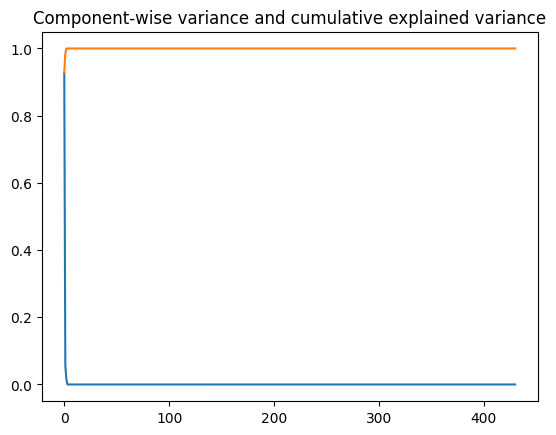

In [40]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise variance and cumulative explained variance")

In [41]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9999) + 1

# Print the number of components required
print("Number of components required to explain 99.99% variance:", n_components)

Number of components required to explain 99.99% variance: 3


In [42]:
X_test_hat = pca.transform(X_test)
print(X_test_hat.shape)

(209715, 431)


In [43]:
X_train_hat_PCA = pd.DataFrame(columns=[f'Projection  on Component {i+1}' for i in range(len(X_train.columns))], data=X_train_hat)
X_train_hat_PCA.head()

,Projection on Component 1,Projection on Component 2,Projection on Component 3,Projection on Component 4,Projection on Component 5,Projection on Component 6,Projection on Component 7,Projection on Component 8,Projection on Component 9,Projection on Component 10,...,Projection on Component 422,Projection on Component 423,Projection on Component 424,Projection on Component 425,Projection on Component 426,Projection on Component 427,Projection on Component 428,Projection on Component 429,Projection on Component 430,Projection on Component 431
0,514.304733,-201.296297,70.917232,3.841331,-1.136645,-0.435523,-0.144737,-0.724012,0.286381,1.774998,...,-3.677614e-16,1.391248e-15,5.134781e-16,-3.469447e-17,9.887924e-17,2.081668e-17,-1.387779e-17,-2.038300e-17,4.906480e-14,8.059409e-14
1,182.886325,453.964858,-114.283219,-0.444071,-0.236075,0.005917,-0.634976,-0.636049,-0.067588,-0.139108,...,-1.131907e-15,-1.987126e-15,1.439820e-16,-2.775558e-17,-1.318390e-16,-1.249001e-16,-2.255141e-17,5.355959e-17,1.144759e-13,-7.353247e-14
2,-15.927570,6.508985,54.676567,-0.335190,0.741053,-0.254397,-1.331161,-0.618550,0.672786,-0.422346,...,-3.226586e-16,-3.434752e-16,-1.179612e-16,0.000000e+00,1.734723e-16,0.000000e+00,9.020562e-17,1.084202e-18,-5.151326e-14,-2.906425e-14
3,-21.638676,38.861176,-20.541097,0.298760,-0.158997,-0.115525,-1.625112,-0.398296,0.160974,-0.218898,...,-1.387779e-17,-8.014422e-16,-3.816392e-16,1.457168e-16,2.324529e-16,-1.110223e-16,-8.326673e-17,-6.071532e-18,-4.822724e-14,-3.257534e-14
4,-438.352620,-165.320055,42.020706,0.291911,1.329039,-0.648133,-0.596661,-0.584287,0.287371,0.456316,...,-7.112366e-17,2.074729e-15,2.879641e-16,2.775558e-17,7.016956e-16,-6.938894e-18,2.272488e-16,1.322727e-17,-1.706781e-13,-2.028948e-13


In [44]:
X_test_hat_PCA = pd.DataFrame(columns=[f'Projection  on Component {i+1}' for i in range(len(X_train.columns))], data=X_test_hat)
X_test_hat_PCA.head()

,Projection on Component 1,Projection on Component 2,Projection on Component 3,Projection on Component 4,Projection on Component 5,Projection on Component 6,Projection on Component 7,Projection on Component 8,Projection on Component 9,Projection on Component 10,...,Projection on Component 422,Projection on Component 423,Projection on Component 424,Projection on Component 425,Projection on Component 426,Projection on Component 427,Projection on Component 428,Projection on Component 429,Projection on Component 430,Projection on Component 431
0,419.847244,9.967571,-98.667078,-1.325401,1.424128,-0.143327,-0.301438,0.185610,-1.537889,0.375166,...,-3.452100e-16,-2.463307e-16,1.804112e-16,2.428613e-17,1.023487e-16,-6.483529e-17,-8.673617e-19,-6.464555e-18,9.886079e-16,-2.215518e-14
1,419.727342,-19.895673,42.517482,-0.913856,0.771215,-0.319100,-0.462229,-0.571835,-0.281212,0.560604,...,3.321995e-16,1.468443e-15,5.741935e-16,-1.387779e-17,2.714842e-16,-5.551115e-17,4.857226e-17,4.011548e-18,-6.249866e-15,-1.213460e-14
2,-245.875446,-194.477427,-26.458261,1.306772,-2.248653,0.978905,-0.821182,-0.544065,-0.574191,-0.011453,...,-2.411266e-16,-8.326673e-17,-3.434752e-16,1.179612e-16,4.250073e-17,-3.469447e-18,-2.949030e-17,-7.296681e-17,-4.253262e-14,3.230552e-15
3,-53.492379,50.997273,-28.912265,0.717113,-1.719573,0.930601,-0.479230,-0.701276,-0.247234,-0.135553,...,-3.330669e-16,-4.406198e-16,-1.387779e-17,3.469447e-18,-1.734723e-17,-4.098284e-17,1.127570e-17,-3.113015e-17,-7.749938e-14,2.384734e-14
4,46.078028,-43.870083,-95.748662,-0.127525,0.274948,-0.243789,0.881091,-0.715139,0.149712,-0.155949,...,-2.099015e-16,-5.412337e-16,-3.833739e-16,1.144917e-16,-2.740863e-16,2.005774e-17,4.683753e-17,-5.347827e-17,2.825534e-14,6.889151e-14


In [45]:
N = 4
X_train_hat_PCA = X_train_hat_PCA.iloc[:, :N]

In [46]:
X_test_hat_PCA = X_test_hat_PCA.iloc[:, :N]

In [47]:
rf_pca = RandomForestClassifier(bootstrap = True,
                                                 criterion = 'entropy', 
                                                  max_depth =  5, 
                                                 n_estimators = 40, n_jobs = 8, 
                                                 random_state = 1)

In [48]:
rf_pca.fit(X_train_hat_PCA,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=40,
                       n_jobs=8, random_state=1)

In [49]:
y_preds_rf_pca=rf_pca.predict(X_test_hat_PCA)

In [50]:
def evaluate_metrics(yt, yp):
    accuracy = accuracy_score(yt, yp)
    precision, recall, fbeta, support = precision_recall_fscore_support(yt, yp, beta=2, pos_label=1, average='binary')
    auc = roc_auc_score(yt, yp)
    print(f"Accuracy is: {accuracy:.2f}")
    print(f"Precision is: {precision:.2f}")
    print(f"Recall is: {recall:.2f}")
    print(f"Fscore is: {fbeta:.2f}")
    print(f"AUC is: {auc:.2f}")

In [51]:
evaluate_metrics(y_test, y_preds_rf_pca)

Accuracy is: 0.75
Precision is: 0.75
Recall is: 1.00
Fscore is: 0.94
AUC is: 0.50


In [52]:
# params_grid_rf_class_weight_pca = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [1, 3, 5, 8],
#     'n_estimators': [5,10,20,40],
#     'class_weight': [{0:2, 1:1},{0:5,1:1},{0:3,1:1},"balanced_subsample"],
#     'max_features': ["log2", "sqrt",None],
#     }

In [53]:
# cv = StratifiedKFold(n_splits=5)

In [54]:
# rf_pca_class_weight_grid_search = GridSearchCV(estimator = rf_pca, 
#                            param_grid = params_grid_rf_class_weight_pca,
#                            scoring='roc_auc',
#                            cv = cv,n_jobs=8)

In [55]:
# rf_pca_class_weight_grid_search.fit(X_train_hat_PCA,y_train)

In [56]:
# rf_pca_class_weight_grid_search_best=rf_pca_class_weight_grid_search.best_estimator_
# print(rf_pca_class_weight_grid_search_best.get_params())

In [57]:
# y_preds_rf_pca_class_weight_grid_search_best=rf_pca_class_weight_grid_search_best.predict(X_test_hat_PCA)

In [58]:
# evaluate_metrics(y_test, y_preds_rf_pca_class_weight_grid_search_best)

In [59]:
rf_pca_class_weight_hp_tuned=RandomForestClassifier(bootstrap = True,
                                                 class_weight ={0: 2, 1: 1}, criterion = 'gini', 
                                                  max_depth =  5, max_features = None, 
                                                 n_estimators = 5, n_jobs = 8, 
                                                 random_state = 1)

In [60]:
rf_pca_class_weight_hp_tuned.fit(X_train_hat_PCA,y_train)

RandomForestClassifier(class_weight={0: 2, 1: 1}, max_depth=5,
                       max_features=None, n_estimators=5, n_jobs=8,
                       random_state=1)

In [61]:
y_preds_rf_pca_class_weight_hp_tuned=rf_pca_class_weight_hp_tuned.predict(X_test_hat_PCA)

In [62]:
evaluate_metrics(y_test, y_preds_rf_pca_class_weight_hp_tuned)

Accuracy is: 0.75
Precision is: 0.75
Recall is: 1.00
Fscore is: 0.94
AUC is: 0.50


In [63]:
from joblib import dump
model_file = 'random_forest_model.joblib'
dump(rf_pca_class_weight_hp_tuned, model_file)

['random_forest_model.joblib']

In [64]:
model_file = 'one_hot_encoder.joblib'
dump(one_hot, model_file)

['one_hot_encoder.joblib']

In [65]:
model_file = 'pca.joblib'
dump(pca, model_file)

['pca.joblib']

In [66]:
model_file = 'standardscaler.joblib'
dump(ss, model_file)

['standardscaler.joblib']